In [1]:
import pandas as pd
import numpy as np
import os
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
import math

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
from numpy import loadtxt
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
os.chdir('C:\\Users\\hp\\Desktop\\ProFinch')

In [8]:
os.listdir()

['Arduino',
 'Atom.lnk',
 'BlockDiagram.png',
 'Competitive Programming 3.pdf',
 'Corsera aid.docx',
 'CustomerData.xlsx',
 'CustomerInfo.csv',
 'DAV_Stuff',
 'desktop.ini',
 'Features List.docx',
 'Flight Delay ML',
 'ID_Proof.pdf',
 'Images',
 'Internship_Krishnakanth.doc',
 'KrishnakanthStuff',
 'Krishnakanth_Resume.pdf',
 'NameList_2b_2021.xlsx',
 'Need for Speed Most Wanted.lnk',
 'Notes',
 'Paper1.pdf',
 'Papers',
 'pic1.jpg',
 'sample1.mp4',
 'sample2.mp4',
 'SDcard',
 'Sem6',
 'SOP_Research.docx',
 'Stuff',
 'Tomcat9w - Shortcut.lnk',
 'µTorrent.lnk']

In [4]:
df=pd.DataFrame()
df=pd.read_excel("CustomerData.xlsx")

In [2]:
df.head()

NameError: name 'df' is not defined

In [13]:
df.dtypes

first_name                  object
last_name                   object
gender                      object
age                          int64
country                     object
state                       object
postal code                  int64
social security number      object
company                     object
job title                   object
salary                       int64
card number                  int64
card type                   object
money_withdrawn_amount      object
money_withdrawn_reason      object
money_withdrawn_location    object
money_withdrawn_time        object
Valid Transaction             bool
dtype: object

In [15]:
df.columns.tolist()

['first_name',
 'last_name',
 'gender',
 'age',
 'country',
 'state',
 'postal code',
 'social security number',
 'company',
 'job title',
 'salary',
 'card number',
 'card type',
 'money_withdrawn_amount',
 'money_withdrawn_reason',
 'money_withdrawn_location',
 'money_withdrawn_time',
 'Valid Transaction']

In [18]:
df.describe()

,age,postal code,salary,card number
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,54.706000,54389.672000,87304.379000,2.843170e+17
std,20.877966,28440.388488,36171.851541,1.191448e+18
min,19.000000,1114.000000,25152.000000,4.017950e+12
25%,37.000000,32068.250000,57169.750000,3.541861e+15
50%,55.000000,55294.500000,87970.000000,3.578881e+15
75%,72.000000,79765.250000,119462.000000,5.522331e+15
max,90.000000,99512.000000,149963.000000,6.771504e+18


In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['gender']= label_encoder.fit_transform(df['gender'])   
df['country']= label_encoder.fit_transform(df['country'])   
df['state']= label_encoder.fit_transform(df['state'])  
df['company']= label_encoder.fit_transform(df['company'])
df['job title']= label_encoder.fit_transform(df['job title'])
df['card type']= label_encoder.fit_transform(df['card type'])
df['money_withdrawn_reason']= label_encoder.fit_transform(df['money_withdrawn_reason'])
df['money_withdrawn_location']= label_encoder.fit_transform(df['money_withdrawn_location'])

In [6]:
for i in range(1000):
    df['money_withdrawn_amount'][i]=df['money_withdrawn_amount'][i][1:]
df['money_withdrawn_amount']=df['money_withdrawn_amount'].astype(float)  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.to_csv('CustomerDataNew.csv')

In [9]:
feature_names=df.drop(['first_name','last_name','Valid Transaction','social security number','money_withdrawn_time'],axis=1)
X=feature_names
y=df['Valid Transaction']

In [68]:
feature_names.columns.tolist()

['gender',
 'age',
 'country',
 'state',
 'postal code',
 'company',
 'job title',
 'salary',
 'card number',
 'card type',
 'money_withdrawn_amount',
 'money_withdrawn_reason',
 'money_withdrawn_location',
 'comapany']

In [10]:
random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=random_state)

# Decision Tree


In [13]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.6666666666666666


# Logistic Regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

C:\Users\super\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7933333333333333


# KNN

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.7666666666666667


# XGB

In [17]:
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.7666666666666667


# Gaussian

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred=gnb.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.78


# ExtraTrees

In [21]:
ext=ExtraTreesClassifier()
ext.fit(X_train, y_train)
pred=ext.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.7633333333333333


C:\Users\super\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


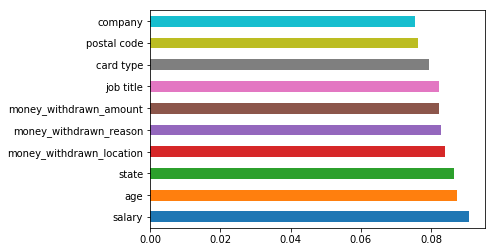

In [79]:
feat_importances = pd.Series(ext.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.7666666666666667


C:\Users\super\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


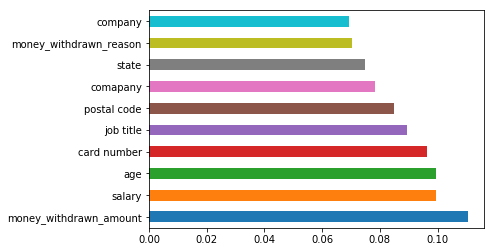

In [83]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()